In [1]:
import shap
import sklearn
from sklearn.linear_model import Lasso
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from xgboost import XGBRegressor
shap.plots.initjs()

/opt/homebrew/anaconda3/envs/shaper/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
X, y = shap.datasets.california()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.8, random_state=7)
model = XGBRegressor().fit(X_train, y_train)
print(f"{X_train.size} {X.size}")
#model = XGBRegressor().fit(X, y)

33024 165120


(4128, 8)
4128


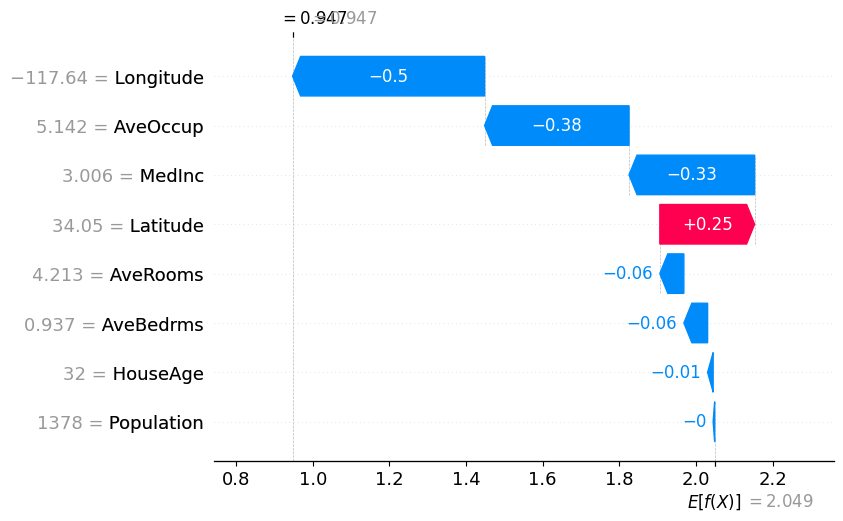

"shap_value: 0.9472190141677856\nsum of all values in explanation: -1.10155189037323\nexplanation features: {'MedInc': np.float32(-0.32771719), 'HouseAge': np.float32(-0.014414318), 'AveRooms': np.float32(-0.06275881), 'AveBedrms': np.float32(-0.061997425), 'Population': np.float32(-0.0039834213), 'AveOccup': np.float32(-0.37695175), 'Latitude': np.float32(0.24735111), 'Longitude': np.float32(-0.5010801)}"

In [ ]:

def get_features_and_values_as_map_from_explanation(explanation: shap.Explanation):
    return {k:explanation.values[v] for v,k in enumerate(explanation.feature_names)}
def sum_all_values_from_explanation(explanation: shap.Explanation):
    return sum(explanation.values)
def get_shap_value(explanation: shap.Explanation):
    return explanation.base_values+sum_all_values_from_explanation(explanation)

explainer = shap.Explainer(model)
shap_values = explainer(X_train)
print(X_train.shape) # 4128
print(len(shap_values)) # 4128
# generate the waterfall graph with the first instance
shap.plots.waterfall(shap_values[0])

first_shap_value: shap.Explanation = shap_values[0]
second_shap_value: shap.Explanation = shap_values[1]
# least important (negative or positive) features are Population and HouseAge
# we can see that we have E[f(X)] = 2.049 (shap.Explanation.base_values) -> this is the average predicted household value across the dataset
# the f(X) = 0.947 is the household value for this specific instance, the first one

f"""shap_value: {first_shap_value.base_values+sum_all_values_from_explanation(first_shap_value)}
sum of all values in explanation: {sum_all_values_from_explanation(first_shap_value)}
explanation features: {get_features_and_values_as_map_from_explanation(first_shap_value)}"""

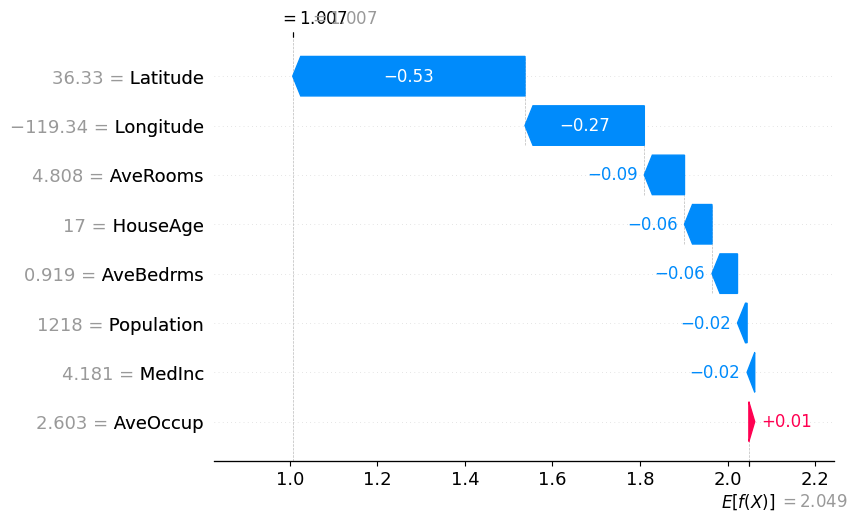

[4.2073145  4.5168114  3.8924603  ... 0.85685384 0.9306728  0.9238534 ]


"-1.10155189037323 {'MedInc': np.float32(-0.32771719), 'HouseAge': np.float32(-0.014414318), 'AveRooms': np.float32(-0.06275881), 'AveBedrms': np.float32(-0.061997425), 'Population': np.float32(-0.0039834213), 'AveOccup': np.float32(-0.37695175), 'Latitude': np.float32(0.24735111), 'Longitude': np.float32(-0.5010801)}"

In [ ]:
# since the f(X) is for the first instance, we should see a different graph for the second instance
shap.plots.waterfall(second_shap_value)
val = model.predict(X[1:2])
print(val)
# and indeed we see. f(X) = 1.007. again, the E[f(X)] = 2.049 is the same since it's the average across the dataset
f"{sum_all_values_from_explanation(first_shap_value)} {get_features_and_values_as_map_from_explanation(first_shap_value)}"

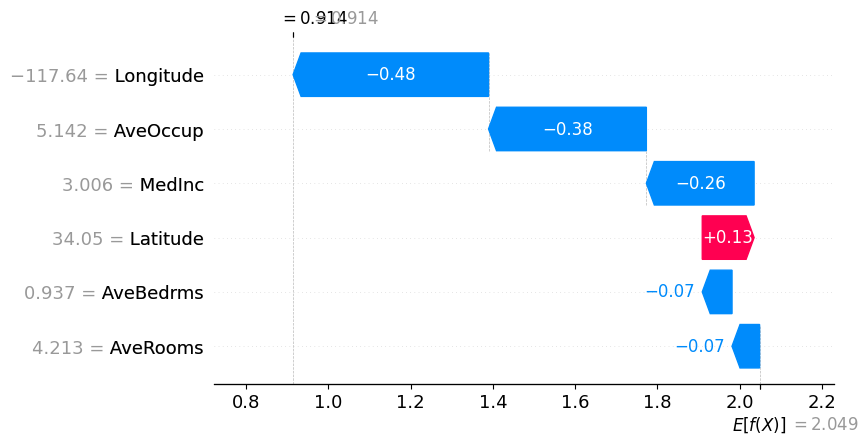

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[0])
second_feature_names = shap_values[0].feature_names.sort(lambda x: shap_values[0].values[x])

# least important (negative or positive) features are AveOccup and Avebedrooms

In [38]:
print(first_feature_names)
print(second_feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

In [7]:
shap.plots.force(shap_values[0:100])

In [12]:
print(model.predict(X_train[0:1]))
shap.plots.force(shap_values[0:1])

[0.9472188]


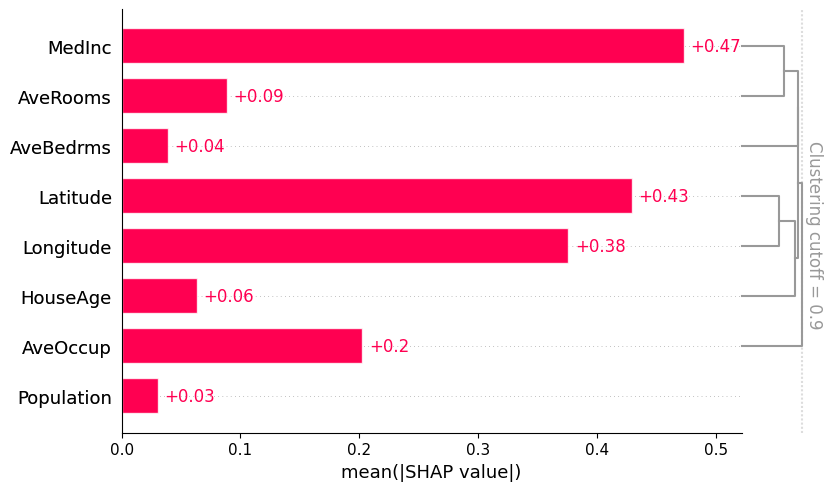

In [26]:
clustering = shap.utils.hclust(X_train, y_train)
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.9)

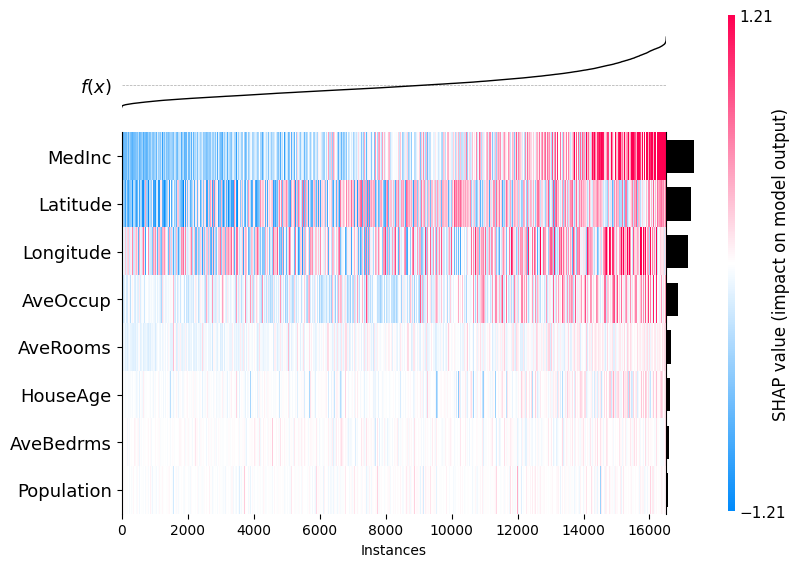

<Axes: xlabel='Instances'>

In [17]:
# order by predictions
y_pred = model.predict(X_test)
shap_values = explainer(X_test)
order = np.argsort(y_pred)
shap.plots.heatmap(shap_values, instance_order=order)

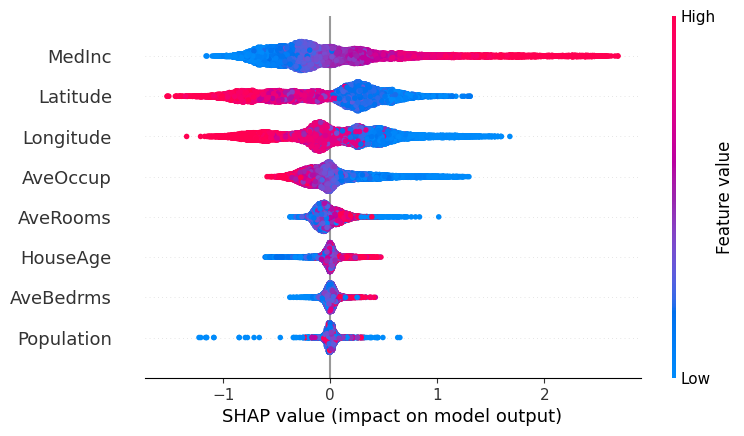

In [27]:
shap.plots.beeswarm(shap_values)